# 1. Run a benchmark with all clean signals

-------------------------
Turned off channels: 1
-------------------------


Within epoch loss (validation) 0.06522: 100%|██████████| 109/109 [00:03<00:00, 33.48it/s]


model on GPU: True


-------------------------
Turned off channels: 2
-------------------------


Within epoch loss (validation) 0.06104: 100%|██████████| 109/109 [00:03<00:00, 34.16it/s]


model on GPU: True


-------------------------
Turned off channels: 3
-------------------------


Within epoch loss (validation) 0.0643: 100%|██████████| 109/109 [00:03<00:00, 33.50it/s] 


model on GPU: True


-------------------------
Turned off channels: 4
-------------------------


Within epoch loss (validation) 0.09099: 100%|██████████| 109/109 [00:03<00:00, 32.86it/s]
/home/david/Desktop/projects/thesis/downstream_classification/executors/train_on_local_machine_v2.py:324: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize = (10,3))
Within epoch loss (validation) 0.06446: 100%|██████████| 109/109 [00:03<00:00, 33.28it/s]


model on GPU: True


-------------------------
Turned off channels: 5
-------------------------


Within epoch loss (validation) 0.06567: 100%|██████████| 109/109 [00:03<00:00, 32.44it/s]


model on GPU: True


-------------------------
Turned off channels: 6
-------------------------


Within epoch loss (validation) 0.06911: 100%|██████████| 109/109 [00:03<00:00, 33.56it/s]


model on GPU: True


-------------------------
Turned off channels: 7
-------------------------


Within epoch loss (validation) 0.07327: 100%|██████████| 109/109 [00:03<00:00, 33.30it/s]


model on GPU: True


-------------------------
Turned off channels: 8
-------------------------


Within epoch loss (validation) 0.06949: 100%|██████████| 109/109 [00:03<00:00, 32.81it/s]


model on GPU: True


-------------------------
Turned off channels: 9
-------------------------


Within epoch loss (validation) 0.07556: 100%|██████████| 109/109 [00:03<00:00, 33.49it/s]


model on GPU: True


-------------------------
Turned off channels: 10
-------------------------


Within epoch loss (validation) 0.08069: 100%|██████████| 109/109 [00:03<00:00, 33.12it/s]


model on GPU: True


-------------------------
Turned off channels: 11
-------------------------


Within epoch loss (validation) 0.10542: 100%|██████████| 109/109 [00:03<00:00, 33.02it/s]


model on GPU: True


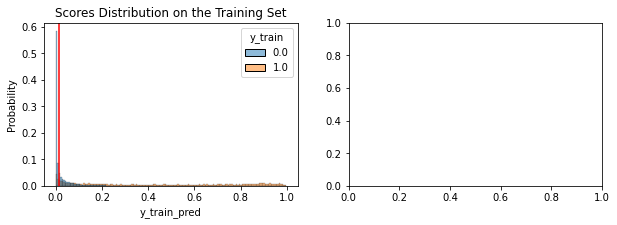

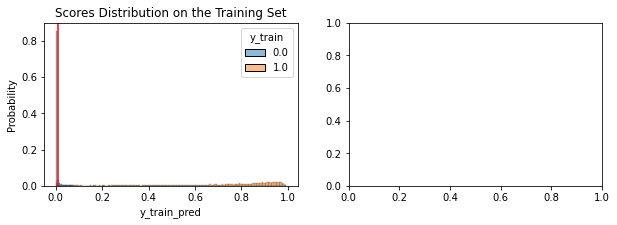

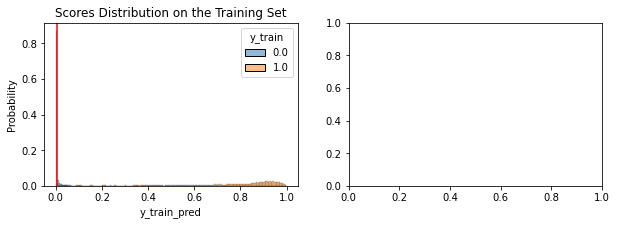

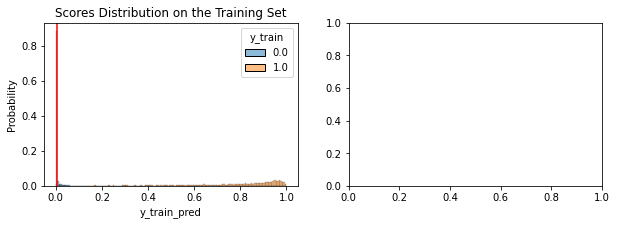

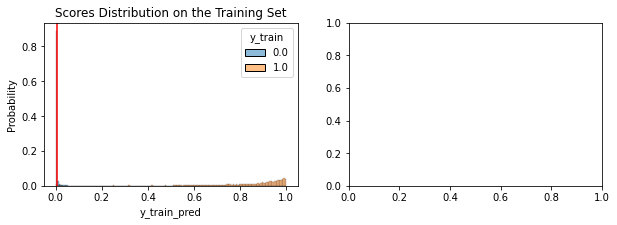

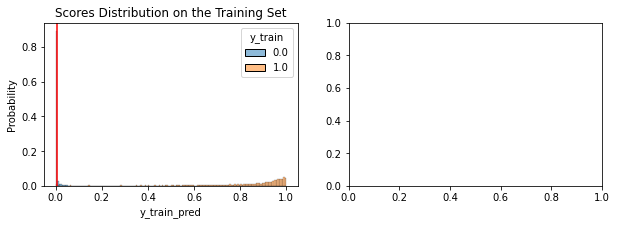

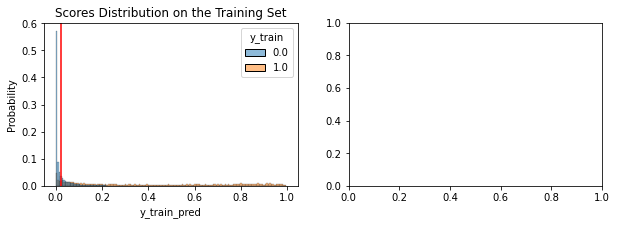

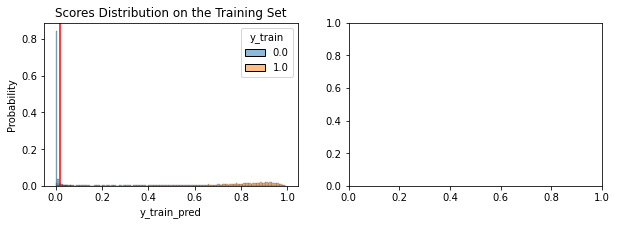

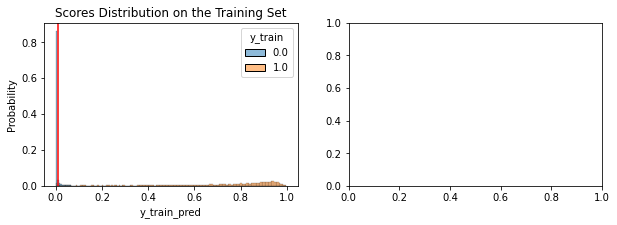

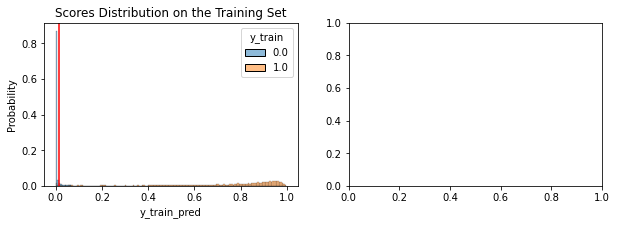

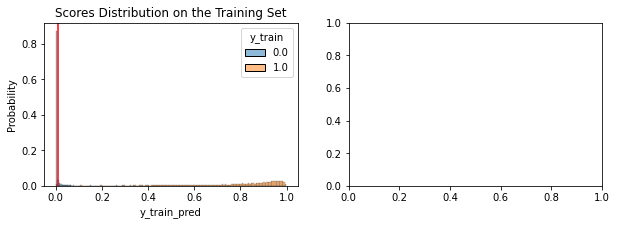

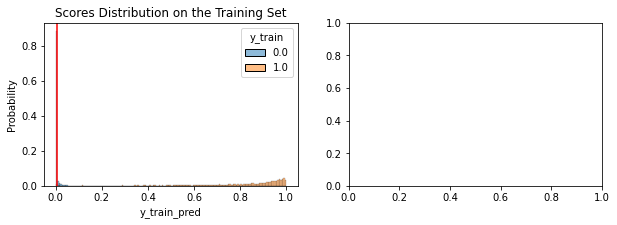

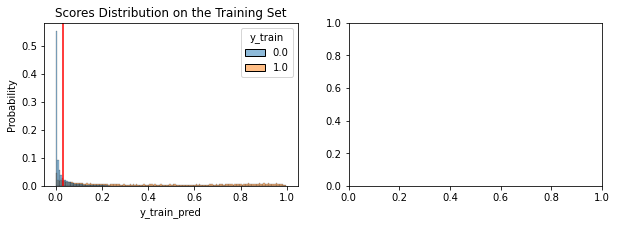

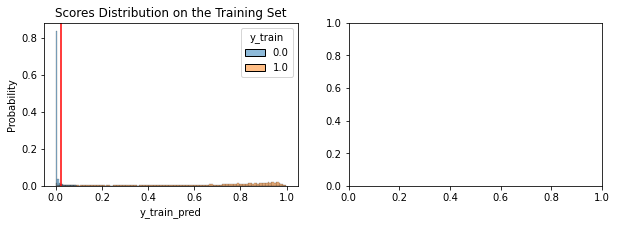

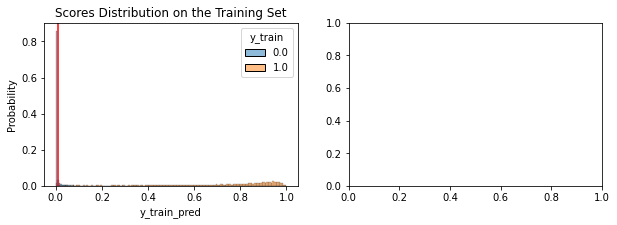

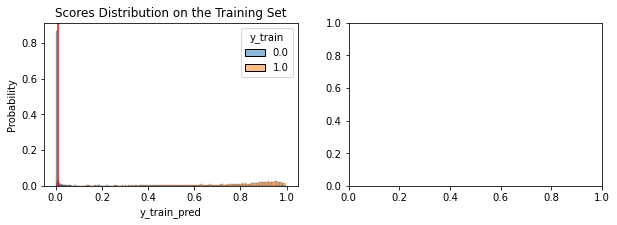

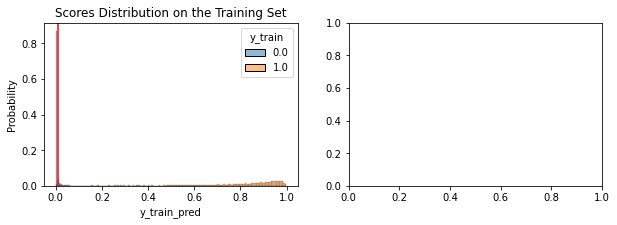

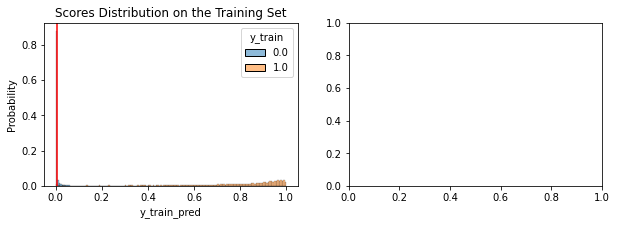

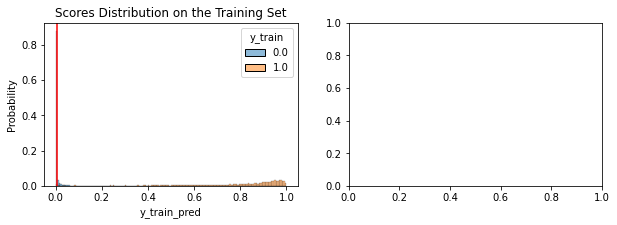

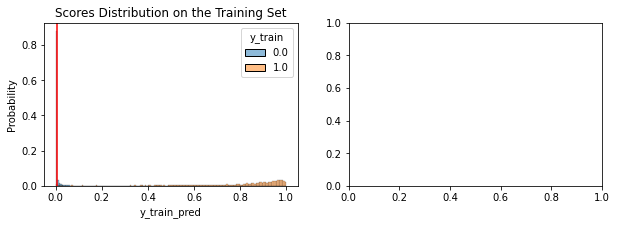

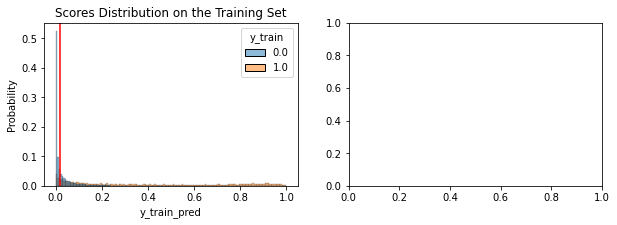

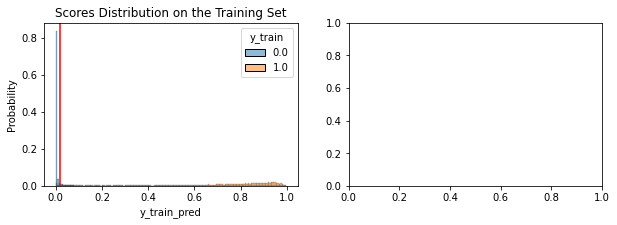

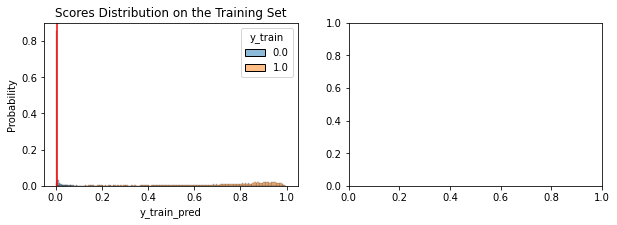

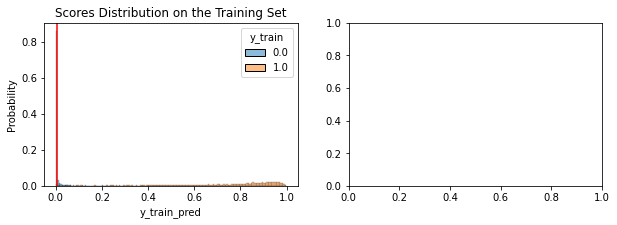

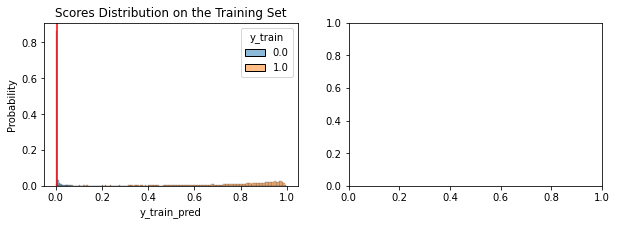

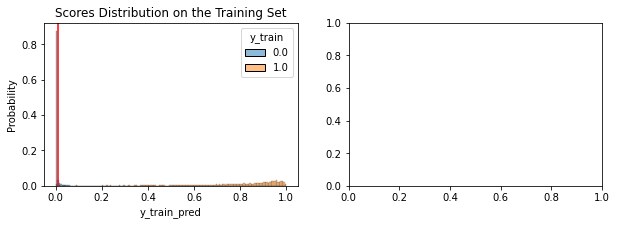

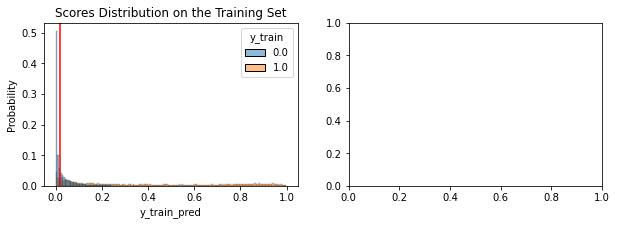

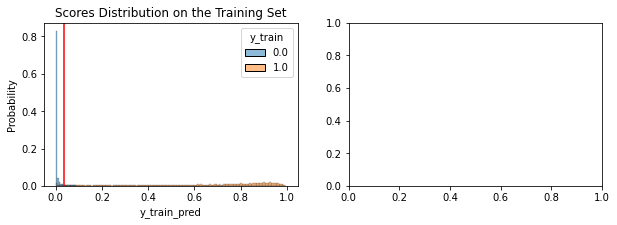

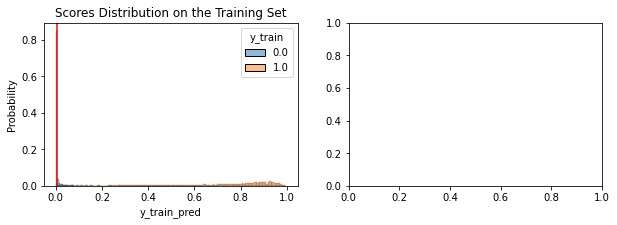

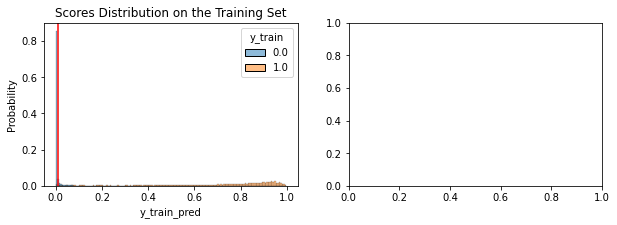

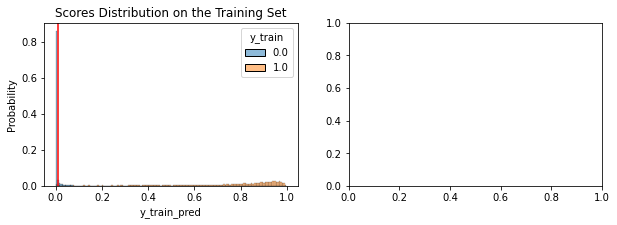

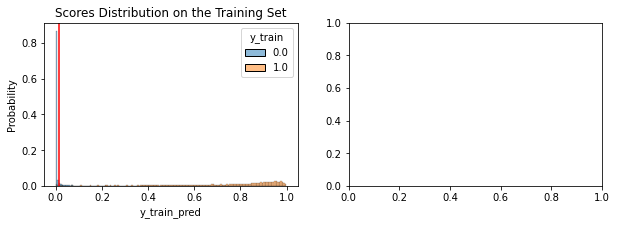

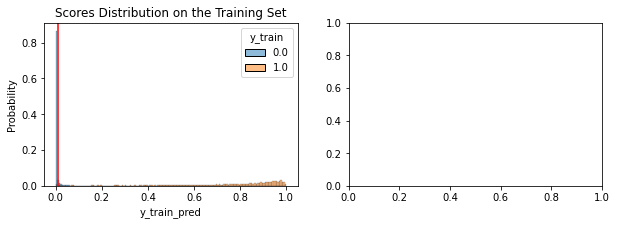

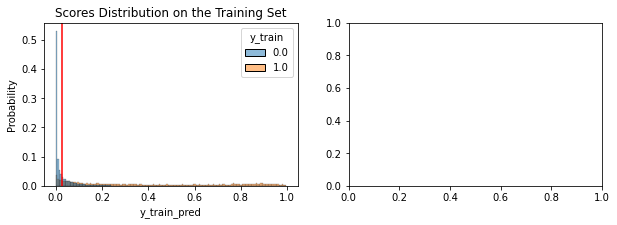

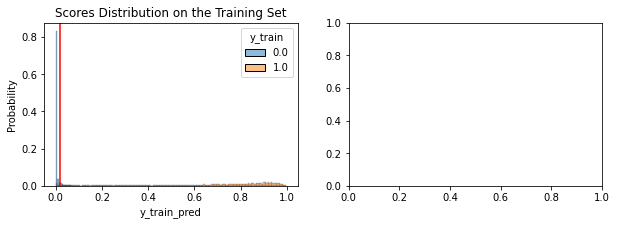

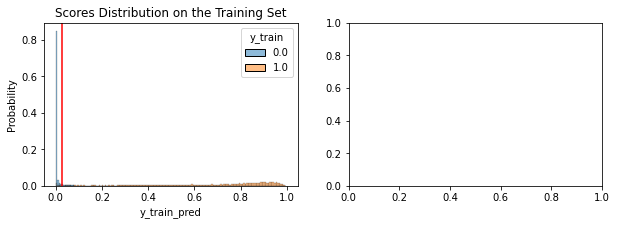

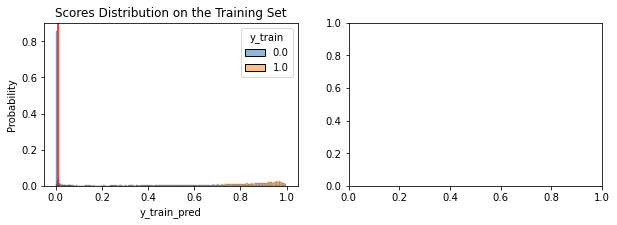

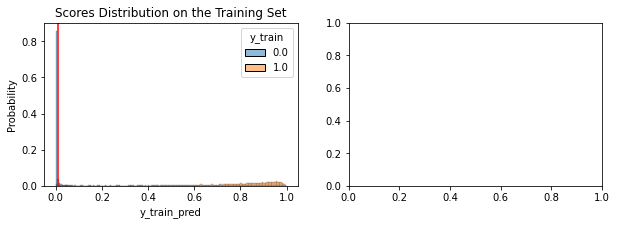

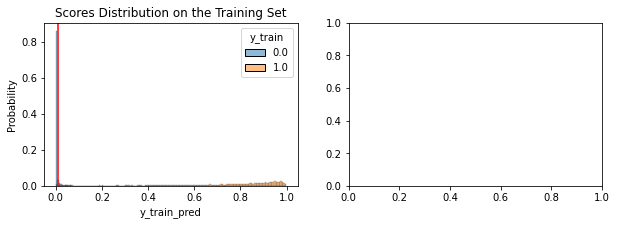

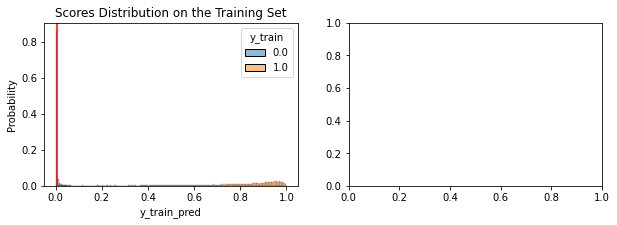

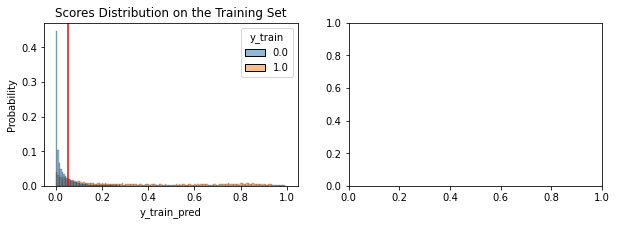

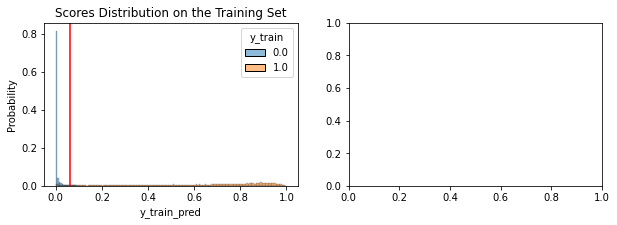

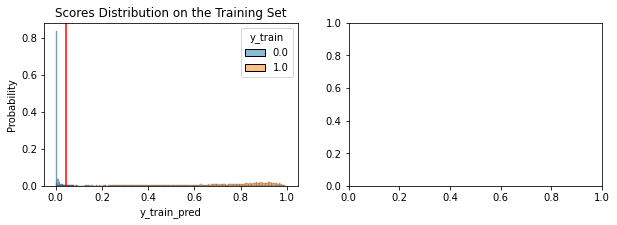

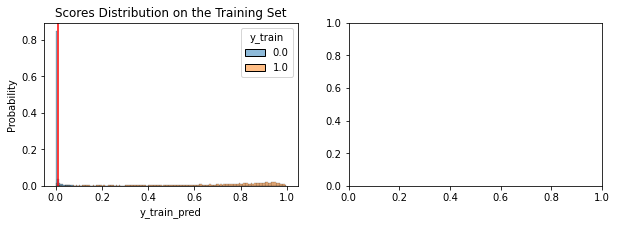

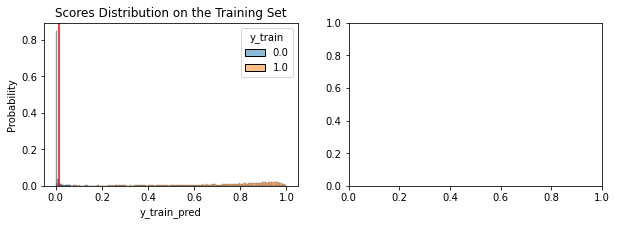

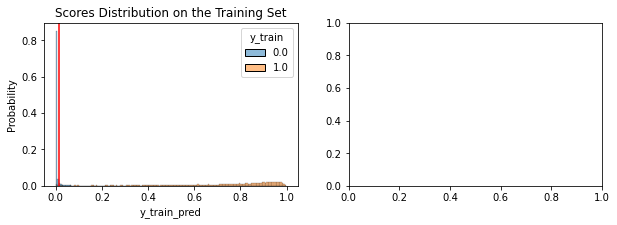

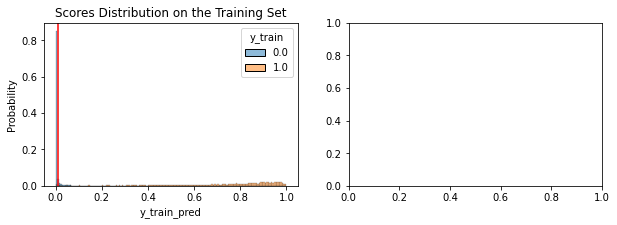

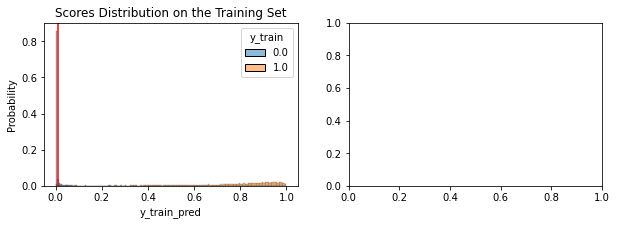

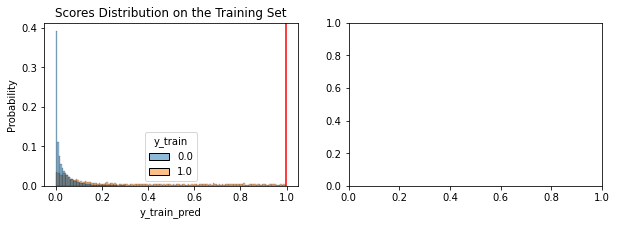

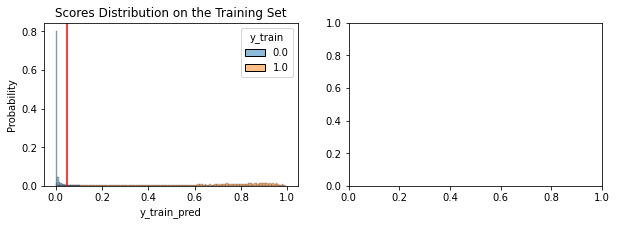

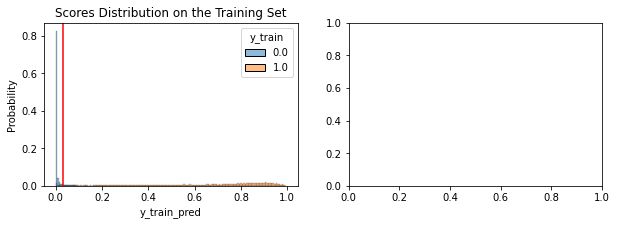

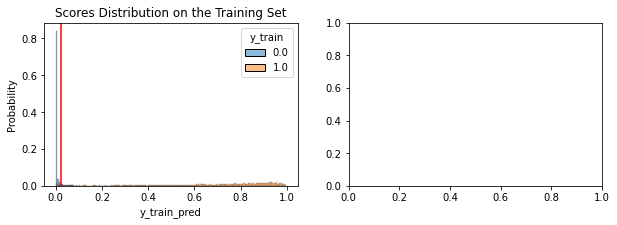

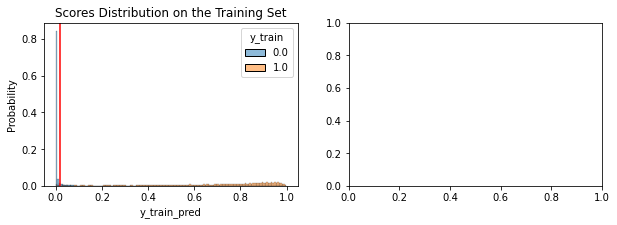

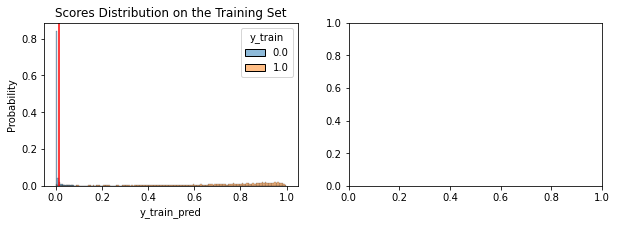

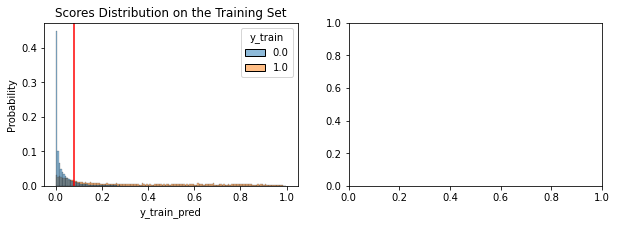

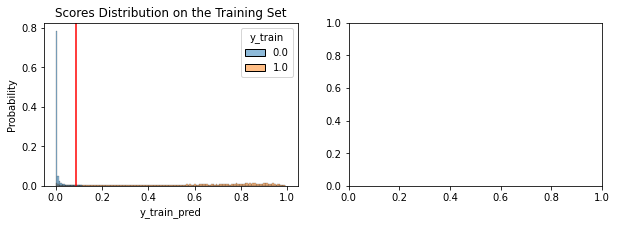

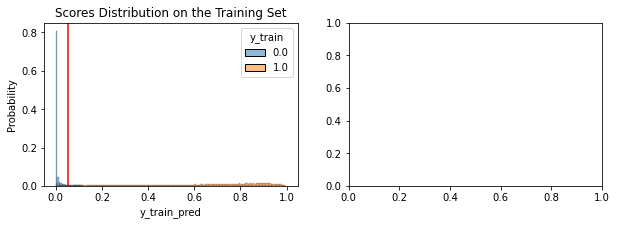

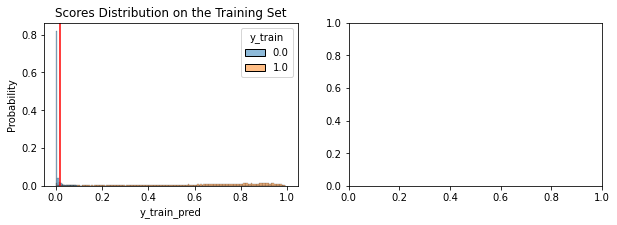

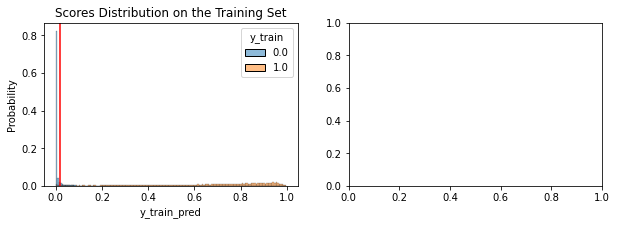

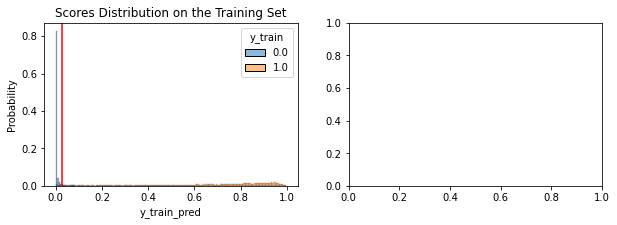

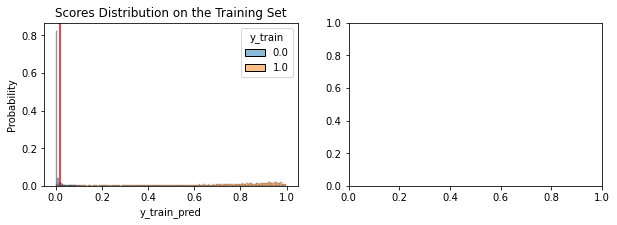

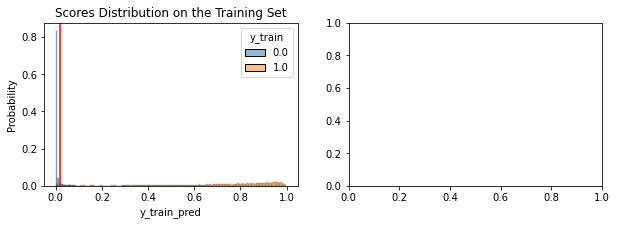

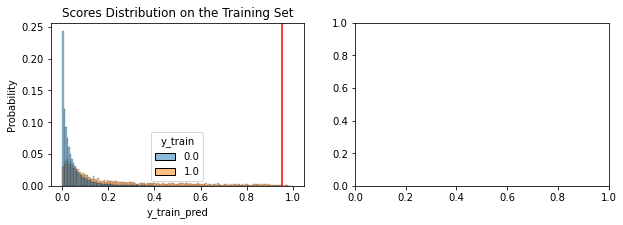

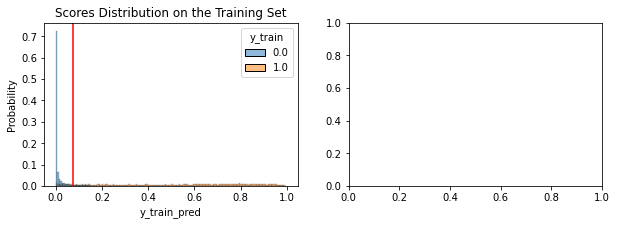

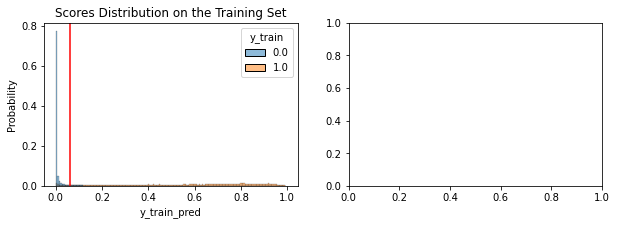

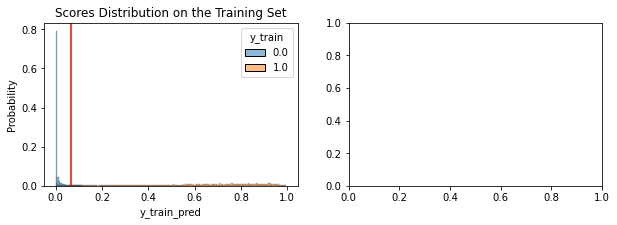

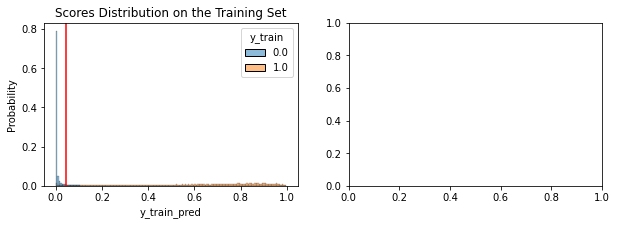

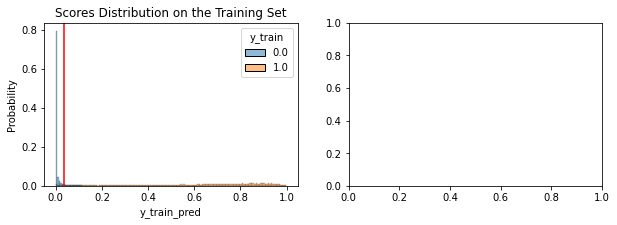

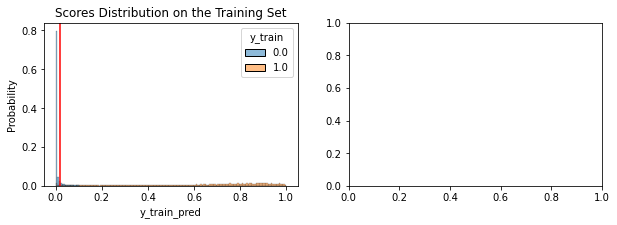

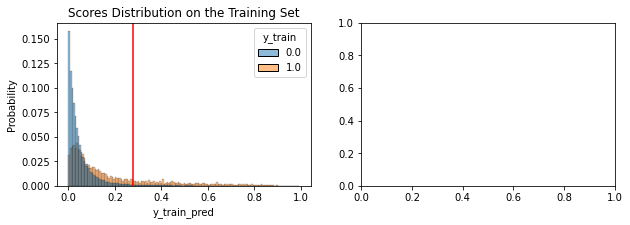

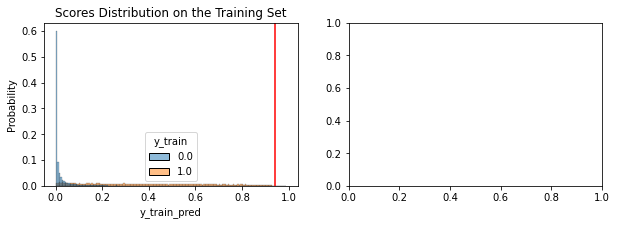

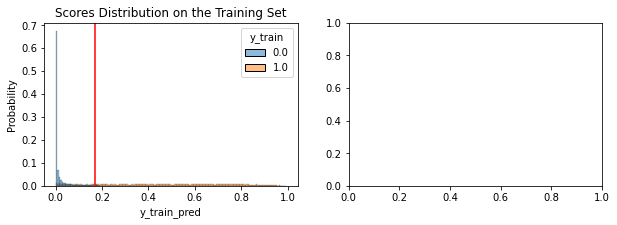

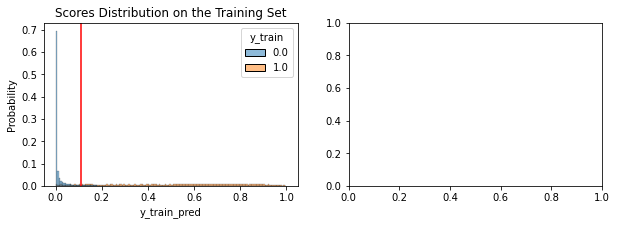

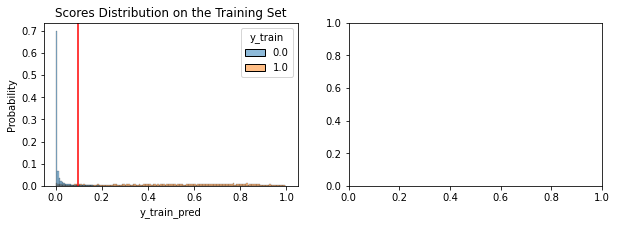

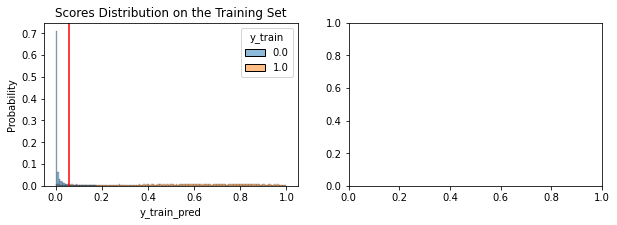

In [4]:
import os
import sys

import numpy as np
import pickle 

# import trainer
sys.path.append('/home/david/Desktop/projects/thesis/downstream_classification')
os.chdir('/home/david/Desktop/projects/thesis/downstream_classification')
from executors.train_on_local_machine_v2 import trainer

best_rocauc_and_pr_auc = {
    'channels_to_turn_off':[],
    'seed':[],
    'validation-roc-auc':[],
    'validation-pr-auc':[],
    'test-roc-auc':[],
    'test-pr-auc':[],
}

seed = 123
# np.random.seed(123)
# seeds = np.random.randint(0,1000, 1)

    
config = {
    
    # general
    'seed': 123,
    # 'metadata_file_path': './data/combined_data/metadata_only_existant_readings_09042023.csv',
    # 'data_folder_path': './data/individual-signals-registered/',
    'metadata_file_path': './data/combined_data/ptb_signal_level_metadata_with_label.csv',
    'data_folder_path':   './data/ptb-ecg-processed-divided-into-450/',


    # training
    'batch_size': 128,
    'n_epochs': 10,
    'weight_decay': 0.3,
    'lr': 0.0005,
    'eval_metric':'rocauc',
    'patience':3,

    # architecture
    'targets': ['AF'],
    'dropout': 0.5,
    'clip': 1,
    'scale':1,
    'depth': 1,
    
    # misc
    'model_saving_path': f'./models/AF-V10-different-seeds-ptb-clean',
    'verbosity':True,

    # test
    'check_on_test':True,
    
    # external data
    'internal_data':False
}

for num_channels_to_turn_off in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
    print('-'*25)
    print(f'Turned off channels: {num_channels_to_turn_off}')
    print('-'*25)

    # set the number of channels to turn off
    config['channels_to_turn_off'] = num_channels_to_turn_off
    config['model_saving_path']= f'./models/AF-V10-different-seeds-ptb-{num_channels_to_turn_off}_channels_off'
    
    # run
    best_rocauc_and_pr_auc_seed = trainer(**config)
    
    # store results
    best_rocauc_and_pr_auc['channels_to_turn_off'].append(num_channels_to_turn_off)
    best_rocauc_and_pr_auc['seed'].append(config['seed'])
    best_rocauc_and_pr_auc['validation-roc-auc'].append(best_rocauc_and_pr_auc_seed['validation-roc-auc'])
    best_rocauc_and_pr_auc['validation-pr-auc'].append(best_rocauc_and_pr_auc_seed['validation-auc-pr'])
    best_rocauc_and_pr_auc['test-roc-auc'].append(best_rocauc_and_pr_auc_seed['test-roc-auc'])
    best_rocauc_and_pr_auc['test-pr-auc'].append(best_rocauc_and_pr_auc_seed['test-auc-pr'])
    
    with open(config['model_saving_path']+'/best_rocauc_and_pr_auc.pkl', 'wb') as f:
        pickle.dump(best_rocauc_and_pr_auc, f)



In [1]:
import pandas as pd
with open('/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V10-different-seeds-ptb-11_channels_off/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
    b = pickle.load(handle)

results = pd.DataFrame(b)
results

NameError: name 'pickle' is not defined

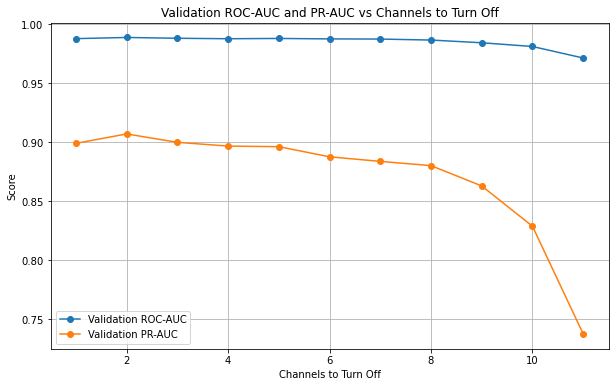

In [11]:
import matplotlib.pyplot as plt

# Plot validation ROC-AUC and PR-AUC against channels_to_turn_off
plt.figure(figsize=(10, 6))

# Plot validation ROC-AUC
plt.plot(results['channels_to_turn_off'], results['validation-roc-auc'], label='Validation ROC-AUC', marker='o')

# Plot validation PR-AUC
plt.plot(results['channels_to_turn_off'], results['validation-pr-auc'], label='Validation PR-AUC', marker='o')

# Add labels and title
plt.xlabel('Channels to Turn Off')
plt.ylabel('Score')
plt.title('Validation ROC-AUC and PR-AUC vs Channels to Turn Off')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


# Different seeds
Let's calculate the last plot with confidence boungs

In [2]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

results_downstream = []
for channels in range(12):
    with open(f'/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V10-different-seeds-ptb-{channels}_channels_off/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
        b = pickle.load(handle)
    bdf = pd.DataFrame(b)
    results_downstream.append(bdf)
results_downstream = pd.concat(results_downstream,axis=0,ignore_index=True)
results_downstream

,channels_to_turn_off,seed,validation-roc-auc,validation-pr-auc,test-roc-auc,test-pr-auc
0,0,510,0.987537,0.887131,0.984566,0.890528
1,0,365,0.988312,0.899567,0.986096,0.900408
2,0,382,0.988041,0.892542,0.984114,0.887986
3,0,322,0.987182,0.879692,0.983696,0.862118
4,0,988,0.987816,0.897239,0.986023,0.897431
...,...,...,...,...,...,...
337,11,17,0.971174,0.752078,0.969983,0.742830
338,11,595,0.971538,0.731189,0.970516,0.754837
339,11,106,0.969148,0.721084,0.970949,0.757185
340,11,123,0.972303,0.746399,0.969963,0.727291


In [3]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

results_both = []
for channels in range(12):
    try:
        with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{channels}_channels_off-no_additional_noise-impute_only_missing/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
            b = pickle.load(handle)
        bdf = pd.DataFrame(b)
        results_both.append(bdf)
    except:
        continue
results_both = pd.concat(results_both,axis=0,ignore_index=True)
results_both

,channels_to_turn_off,seed,validation-roc-auc,validation-pr-auc,test-roc-auc,test-pr-auc
0,0,510,0.987440,0.896875,0.984421,0.901573
1,0,365,0.988413,0.899375,0.984817,0.898545
2,0,382,0.987482,0.894517,0.984570,0.901806
3,0,322,0.987750,0.897422,0.985358,0.903415
4,0,988,0.987437,0.903178,0.984434,0.886553
...,...,...,...,...,...,...
163,11,382,0.969431,0.726749,0.966800,0.731751
164,11,322,0.968567,0.702390,0.965306,0.712662
165,11,988,0.967527,0.698073,0.967106,0.733022
166,11,98,0.967062,0.694384,0.963792,0.698660


In [3]:
# import pandas as pd
# import pickle
# import matplotlib.pyplot as plt
# import seaborn as sns

# results_both_f = []
# for channels in range(4,6):
#     with open(f'/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/ptb-{channels}_channels_off-no_additional_noise-impute_only_missing-False/best_rocauc_and_pr_auc.pkl', 'rb') as handle:
#         b = pickle.load(handle)
#     bdf = pd.DataFrame(b)
#     results_both_f.append(bdf)
# results_both_f = pd.concat(results_both_f,axis=0,ignore_index=True)
# results_both_f

,channels_to_turn_off,seed,validation-roc-auc,validation-pr-auc,test-roc-auc,test-pr-auc
0,4,510,0.961309,0.645847,0.961781,0.625937
1,4,365,0.962951,0.634127,0.962090,0.654048
2,4,382,0.959133,0.622560,0.958442,0.649895
3,4,322,0.963204,0.647571,0.965286,0.675090
4,4,988,0.963491,0.616508,0.964935,0.640674
5,4,98,0.962066,0.636353,0.962559,0.655724
6,4,742,0.961574,0.639466,0.960435,0.639141
7,4,17,0.964018,0.651718,0.964818,0.656673
8,4,595,0.960480,0.632298,0.959180,0.637524
9,4,106,0.963007,0.636752,0.964800,0.672643


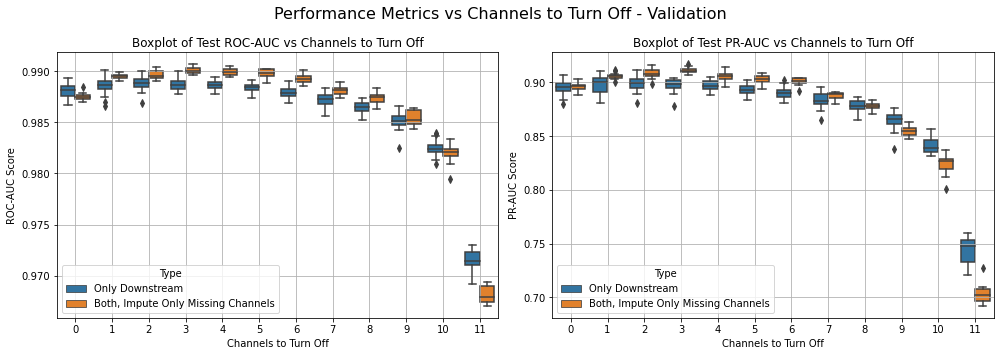

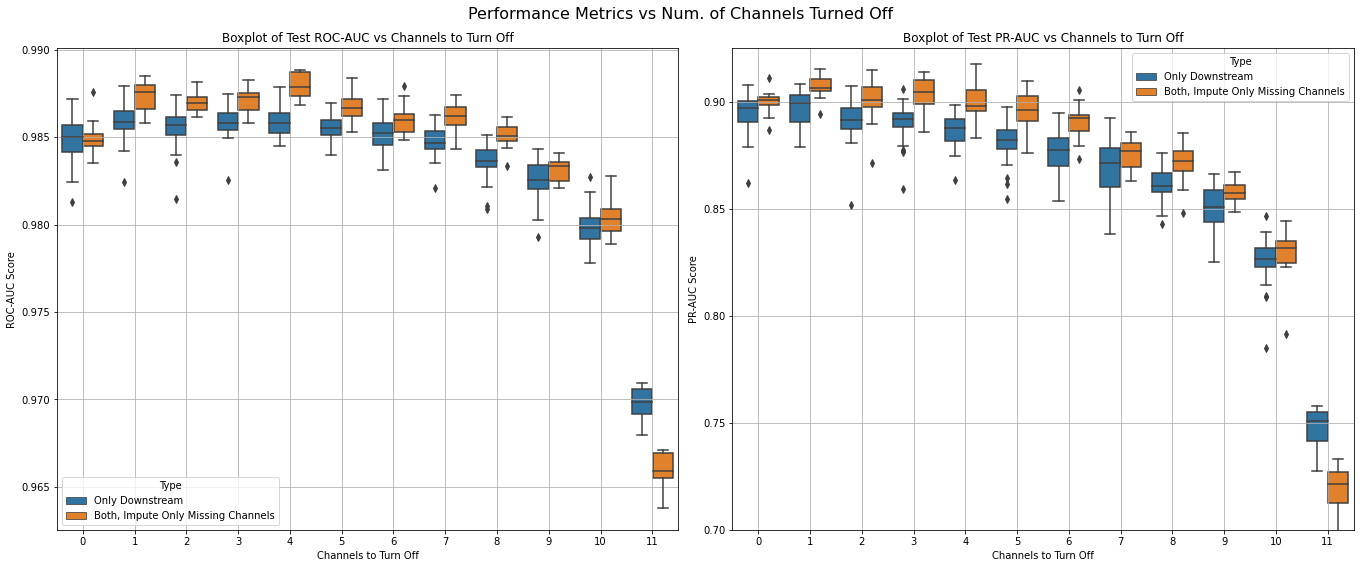

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Combine the results for ROC-AUC and PR-AUC into a single DataFrame for easier plotting
results_downstream['Type'] = 'Only Downstream'
results_both['Type'] = 'Both, Impute Only Missing Channels'
combined_results = pd.concat([results_downstream, results_both])
# results_both_f['Type'] = 'Both, Impute All Channels'
# combined_results = pd.concat([results_downstream, results_both,results_both_f])

# Boxplot for ROC-AUC
sns.boxplot(x='channels_to_turn_off', y='validation-roc-auc', hue='Type', data=combined_results, ax=axs[0])
axs[0].set_title('Boxplot of Test ROC-AUC vs Channels to Turn Off')
axs[0].set_xlabel('Channels to Turn Off')
axs[0].set_ylabel('ROC-AUC Score')
axs[0].grid(True)

# Boxplot for PR-AUC
sns.boxplot(x='channels_to_turn_off', y='validation-pr-auc', hue='Type', data=combined_results, ax=axs[1])
axs[1].set_title('Boxplot of Test PR-AUC vs Channels to Turn Off')
axs[1].set_xlabel('Channels to Turn Off')
axs[1].set_ylabel('PR-AUC Score')
axs[1].grid(True)

# Show the plots
plt.suptitle('Performance Metrics vs Channels to Turn Off - Validation', fontsize=16)
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(19, 8))

# Combine the results for ROC-AUC and PR-AUC into a single DataFrame for easier plotting
results_downstream['Type'] = 'Only Downstream'
results_both['Type'] = 'Both, Impute Only Missing Channels'
combined_results = pd.concat([results_downstream, results_both])
# results_both_f['Type'] = 'Both, Impute All Channels'
# combined_results = pd.concat([results_downstream, results_both,results_both_f])

# Boxplot for ROC-AUC
sns.boxplot(x='channels_to_turn_off', y='test-roc-auc', hue='Type', data=combined_results, ax=axs[0])
axs[0].set_title('Boxplot of Test ROC-AUC vs Channels to Turn Off')
axs[0].set_xlabel('Channels to Turn Off')
axs[0].set_ylabel('ROC-AUC Score')
axs[0].grid(True)

# Boxplot for PR-AUC
sns.boxplot(x='channels_to_turn_off', y='test-pr-auc', hue='Type', data=combined_results, ax=axs[1])
axs[1].set_title('Boxplot of Test PR-AUC vs Channels to Turn Off')
axs[1].set_xlabel('Channels to Turn Off')
axs[1].set_ylabel('PR-AUC Score')
axs[1].grid(True)
axs[1].set_ylim((0.7,0.925))

# Show the plots
plt.suptitle('Performance Metrics vs Num. of Channels Turned Off', fontsize=16)
plt.tight_layout()
plt.show()


In [4]:
combined_results

# Group by 'channels_to_turn_off' and 'type', then calculate the mean of 'test-roc-auc'
summary_table = combined_results.pivot_table(
    index='channels_to_turn_off',
    columns='Type',
    values='test-roc-auc',
    aggfunc='mean'
).reset_index()


# Calculate standard error for each type
std_errors = combined_results.groupby(['channels_to_turn_off', 'Type'])['test-roc-auc'].sem().unstack()

# Multiply by 100 and round to 2 decimal places
summary_table[["Both, Impute Only Missing Channels", "Only Downstream"]] = summary_table[["Both, Impute Only Missing Channels", "Only Downstream"]] * 100
summary_table[["Both, Impute Only Missing Channels", "Only Downstream"]] = summary_table[["Both, Impute Only Missing Channels", "Only Downstream"]].round(2)
summary_table["Both, Impute Only Missing Channels"] = summary_table["Both, Impute Only Missing Channels"].astype(str)
summary_table["Only Downstream"] = summary_table["Only Downstream"].astype(str)

std_errors[['Both, Impute Only Missing Channels', 'Only Downstream']] = (std_errors[['Both, Impute Only Missing Channels', 'Only Downstream']]*100).round(2)
std_errors["Both, Impute Only Missing Channels"] = std_errors["Both, Impute Only Missing Channels"].astype(str)
std_errors["Only Downstream"] = std_errors["Only Downstream"].astype(str)

display(summary_table, std_errors)

std_errors = std_errors.reset_index()
summary_table_redundant = summary_table.merge(std_errors, on = 'channels_to_turn_off')
summary_table_redundant['Both, Impute Only Missing Channels'] = None
summary_table_redundant['Only Downstream'] = None
for j in range(len(summary_table_redundant)):
    mean_ = summary_table_redundant['Both, Impute Only Missing Channels_x'][j]
    se_ = summary_table_redundant['Both, Impute Only Missing Channels_y'][j]
    summary_table_redundant['Both, Impute Only Missing Channels'][j] = f'{mean_} ({se_})'
    
    mean_ = summary_table_redundant['Only Downstream_x'][j]
    se_ = summary_table_redundant['Only Downstream_y'][j]
    summary_table_redundant['Only Downstream'][j] = f'{mean_} ({se_})'
    

summary_table_redundant[["channels_to_turn_off", "Both, Impute Only Missing Channels", "Only Downstream"]]

# # Convert columns to strings and add standard error in parentheses
# summary_table = summary_table.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else str(x))
# # for col in summary_table.columns[1:]:
# #     # summary_table[col] = summary_table[col] + f" ({std_errors[col.replace('average_test_roc_auc_', '')].mean()})"
# #     summary_table[col] = summary_table[col] + f" ({std_errors[col.replace('average_test_pr_auc_', '')].mean()*100:.9f})"



Type,channels_to_turn_off,"Both, Impute Only Missing Channels",Only Downstream
0,0,98.49,98.48
1,1,98.73,98.59
2,2,98.7,98.56
3,3,98.71,98.58
4,4,98.8,98.58
5,5,98.67,98.56
6,6,98.6,98.51
7,7,98.61,98.47
8,8,98.51,98.36
9,9,98.31,98.26


Type,"Both, Impute Only Missing Channels",Only Downstream
channels_to_turn_off,,
0,0.02,0.02
1,0.02,0.02
2,0.02,0.02
3,0.02,0.02
4,0.02,0.01
5,0.02,0.01
6,0.02,0.02
7,0.03,0.02
8,0.02,0.02


/tmp/ipykernel_440776/4234640609.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table_redundant['Both, Impute Only Missing Channels'][j] = f'{mean_} ({se_})'
/tmp/ipykernel_440776/4234640609.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_table_redundant['Only Downstream'][j] = f'{mean_} ({se_})'


Type,channels_to_turn_off,"Both, Impute Only Missing Channels",Only Downstream
0,0,98.49 (0.02),98.48 (0.02)
1,1,98.73 (0.02),98.59 (0.02)
2,2,98.7 (0.02),98.56 (0.02)
3,3,98.71 (0.02),98.58 (0.02)
4,4,98.8 (0.02),98.58 (0.01)
5,5,98.67 (0.02),98.56 (0.01)
6,6,98.6 (0.02),98.51 (0.02)
7,7,98.61 (0.03),98.47 (0.02)
8,8,98.51 (0.02),98.36 (0.02)
9,9,98.31 (0.02),98.26 (0.02)


# Changing base rates - irrelevant

In [5]:
import os
import sys

import numpy as np
import pickle 

# import trainer
sys.path.append('/home/david/Desktop/projects/thesis/downstream_classification')
os.chdir('/home/david/Desktop/projects/thesis/downstream_classification')

from executors.train_on_local_machine_v2 import trainer
import pandas as pd
ptb_metadata = pd.read_csv('./data/combined_data/ptb_signal_level_metadata_with_label.csv',index_col=0)
internal_metadata = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv',index_col=0)

print('Before')
print('\tInternal')
display(internal_metadata['AF'].value_counts(normalize=True))

print('\tPTB')
display(ptb_metadata['AF'].value_counts(normalize=True))


Before
	Internal


0.0    0.749086
1.0    0.250914
Name: AF, dtype: float64

	PTB


0    0.930668
1    0.069332
Name: AF, dtype: float64